<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Loading-dataset" data-toc-modified-id="Loading-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading dataset</a></span></li><li><span><a href="#Calculating-Profit" data-toc-modified-id="Calculating-Profit-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculating Profit</a></span></li><li><span><a href="#Nolan-Movies" data-toc-modified-id="Nolan-Movies-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Nolan Movies</a></span></li><li><span><a href="#Favorite-Genres" data-toc-modified-id="Favorite-Genres-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Favorite Genres</a></span></li><li><span><a href="#Score-Histogram" data-toc-modified-id="Score-Histogram-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Score Histogram</a></span></li><li><span><a href="#Actors/Actresses-Activity" data-toc-modified-id="Actors/Actresses-Activity-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Actors/Actresses Activity</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Correlations</a></span></li></ul></div>

## Description
Pandas is one of the most important Python libraries in data science. In this problem, we are going to get familiar with this library. 

## Import 
Put all of your imports for this file in the below cell.

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Loading dataset
Load the IMDB-Movie-Data.csv file into a pandas dataframe and show its first 5 rows. Each row of this dataframe corresponds to one film.

In [3]:
df = pd.read_csv('IMDB-Movie-Data.csv')
df.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Calculating Profit
Add a column to the dataframe that calculate the profit of the movies. (Suppose the inflation rate is 3% and 1990 as the base year)

In [4]:
df['Profit'] = df.apply(lambda x: 1.03 ** (1990 - x['Year']) * x['Revenue (Millions)'], axis=1)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Profit
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,163.877886
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,65.998526
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,64.045516
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,125.345959
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,150.710060


## Nolan Movies
Filter Christofer Nolan movies and sort them in a descending order with respect to their profits then show the result.

In [5]:
df_nol = df[df['Director'] == "Christopher Nolan"].sort_values(by = ['Profit'], ascending = False).reset_index(drop=True)
df_nol

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Profit
0,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,313.269292
1,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,233.875686
2,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,161.988915
3,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,92.478623
4,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0,33.077701


## Favorite Genres
Calculate the revenues of different genres in a dataframe and sort them in a descending order. Then show the result.

In [6]:
df_revenue = df[['Genre', 'Revenue (Millions)']].groupby('Genre').sum().sort_values(by = ['Revenue (Millions)'], ascending = False).reset_index()
df_revenue.head()

,Genre,Revenue (Millions)
0,"Action,Adventure,Sci-Fi",10461.51
1,"Animation,Adventure,Comedy",5754.75
2,"Action,Adventure,Fantasy",5248.29
3,"Adventure,Family,Fantasy",2201.47
4,Comedy,1941.81


If we want to specify each genere seprately:

In [7]:
genres = dict()
for index, item in df_revenue.iterrows():
    for genre in item['Genre'].split(","):
        if genre in genres:
            genres[genre] =  genres[genre] + item['Revenue (Millions)']
        else:
            genres[genre] = item['Revenue (Millions)']
            
genres = {k: v for k, v in sorted(genres.items(), key=lambda item: item[1], reverse=True)}
df_genres_revenue = pd.DataFrame.from_dict(genres, orient='index', columns=['Sum of revenue (Millions)'])
df_genres_revenue

,Sum of revenue (Millions)
Adventure,38852.61
Action,35605.42
Drama,21931.45
Comedy,19316.45
Sci-Fi,14910.78
Fantasy,12262.06
Thriller,10645.32
Animation,8987.50
Crime,8034.62
Family,6182.61


## Score Histogram
Draw the histogram of metascores and ratings. 

Text(0.5, 0.98, 'Metascore histogram')

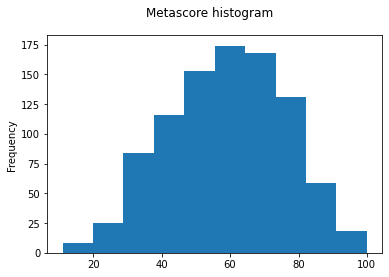

In [59]:
df['Metascore'].plot.hist(bins=10)
plt.suptitle('Metascore histogram')

Text(0.5, 0.98, 'Ratings histogram')

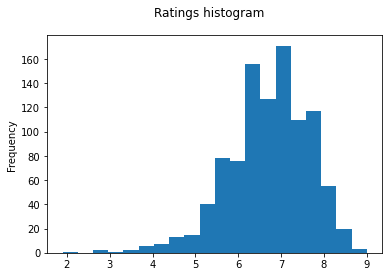

In [7]:
df['Rating'].plot.hist(bins=20)
plt.suptitle('Ratings histogram')

## Actors/Actresses Activity
For each Actors/Actresses caculate the number of movies in the dataframe, then sort the actors/actresses first by their number of movies in descending order and then by their name in ascending order. 

In [56]:
actors = dict()
for item in df['Actors']:
    for actor in re.split(' ,|, |,', item):
        if actor in actors:
            actors[actor] =  actors[actor] + 1
        else:
            actors[actor] = 1
            
actors = {k: v for k, v in sorted(actors.items(), key=lambda item: item[1], reverse=True)}
df_actors = pd.DataFrame.from_dict(actors, orient='index', columns=['Number of movies'])
df_actors

,Number of movies
Mark Wahlberg,15
Hugh Jackman,14
Christian Bale,13
Brad Pitt,13
Michael Fassbender,12
...,...
Adam G. Sevani,1
Adam Pally,1
Thomas Middleditch,1
Shannon Woodward,1


In [57]:
actors = {k: v for k, v in sorted(actors.items(), key=lambda item: item[0], reverse=False)}
df_actors = pd.DataFrame.from_dict(actors, orient='index', columns=['Number of movies'])
df_actors

,Number of movies
50 Cent,1
A.C. Peterson,1
AJ Michalka,1
Aamir Khan,4
Aaron Burns,2
...,...
Zoë Bell,2
Zoë Kravitz,2
Émilie Leclerc,1
Ólafur Darri Ólafsson,1


## Correlations
Calculate the correlation between rating, votes and metascore of the movies.
Is there any meaningful relation between these features? 

In [106]:
df_corr = df[['Rating', 'Votes', 'Metascore']]
df_corr.corr()

,Rating,Votes,Metascore
Rating,1.000000,0.511537,0.631897
Votes,0.511537,1.000000,0.325684
Metascore,0.631897,0.325684,1.000000


The correlation between 'Rating' and 'Votes' is about 0.51, the correlation between 'Rating' and 'Metascore' is about 0.63 and the correlation between 'Metascore' and 'Votes' is about 0.33.
These numbers are not really big enough to say that there is a really big and meaningful correlation but between 'Rating' and 'Metascore' that has the largest correlation we can say that there is some how a little correlation